In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# Change directory
os.chdir("/home/gayatri/storm-data/n_1")

In [13]:
mlist = 'n_1_corti.txt'
df = pd.read_csv(mlist, sep='\t')
file_name = mlist.rsplit('.txt',1)[0][:] # Edit this ! 

### Calculate localization precision ###  


In [18]:
a = 167 # pixel dimensions
gain = 0.42
df['sigma_s_2'] = (df['Width']/2)**2 + (a**2)/12
df['sigma_xy_2'] = (df['sigma_s_2']/(df['I']*gain)) * ((16/9) + (8*numpy.pi*df['sigma_s_2']*((df['BG']*gain)**2))/((df['I']*gain)*a**2))
df['sigma_xy'] = numpy.sqrt(df['sigma_xy_2'])

In [36]:
df[['Width','sigma_xy']].describe().round(2).to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &   Width &  sigma\\_xy \\\\\n\\midrule\ncount &   50.00 &     50.00 \\\\\nmean  &  357.78 &     73.52 \\\\\nstd   &   50.48 &     32.10 \\\\\nmin   &  272.83 &     14.26 \\\\\n25\\%   &  319.53 &     44.11 \\\\\n50\\%   &  353.51 &     78.74 \\\\\n75\\%   &  384.04 &     97.84 \\\\\nmax   &  492.01 &    142.54 \\\\\n\\bottomrule\n\\end{tabular}\n'

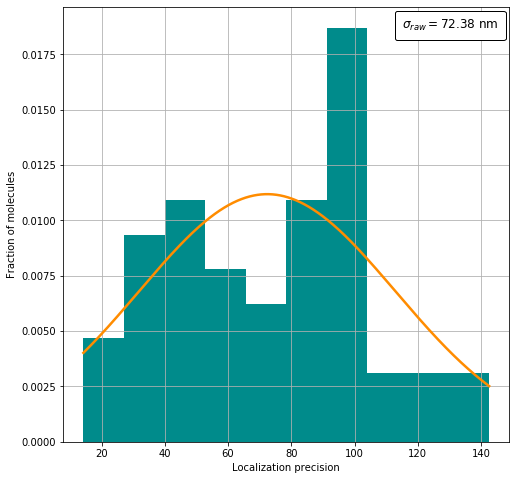

In [29]:
import matplotlib.pyplot as plt
import numpy
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText

def fit_function(x, B, mu, sigma):
    return (B * numpy.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

bins_hist = numpy.histogram_bin_edges(df['sigma_xy'], bins='auto')
hist, bin_edges = numpy.histogram(df['sigma_xy'], bins = bins_hist, density=True)
bin_centers = numpy.empty((0))
for i in range(len(bin_edges)-1):
    d = (bin_edges[i] + bin_edges[i+1])/2
    bin_centers = numpy.append(bin_centers, numpy.array([d]), axis=0)

popt, pcov = curve_fit(fit_function, xdata=bin_centers, ydata=hist, p0=[1.0, 70.0, 30])

float_formatter = "{:.2f}".format
numpy.set_printoptions(formatter={'float_kind':float_formatter})

fig, ax = plt.subplots(figsize = (8,8))
x_new = numpy.linspace(df['sigma_xy'].min(),df['sigma_xy'].max(), num=1500)

p_Hist = df['sigma_xy'].hist(bins=10, color='darkcyan', density = True)
plt.plot(x_new, fit_function(x_new, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')
at = AnchoredText(r'$\sigma_{raw} = $' + str(numpy.around(popt[1],2)) + " nm",
                loc='upper right', prop=dict(size=12), frameon=True,
                )
at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
ax.add_artist(at)
plt.ylabel('Fraction of molecules')
plt.xlabel('Localization precision')

plt.savefig(file_name + '_sigma_xy')
plt.show()



